In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
from astropy.utils.data import download_file
import shutil
import sys
from tqdm import tqdm

### Getting duration + other information

In [105]:
# duration
url='https://batse.msfc.nasa.gov/batse/grb/catalog/current/tables/duration_table.txt'
tmp_path = download_file(url)
lc_path = "LC/duration_table.csv"
shutil.move(tmp_path, lc_path)
header=['Trigger', 'T50', 'sigma_T50', 'start_T50','T90', 'sigma_T90', 'start_T90']
duration=pd.read_csv('LC/duration_table.csv', delimiter="    ",names=header) # the delimiter here is super weird but don't change it 
# duration.rename(columns=, inplace=True)
# duration.columns=header
duration.astype({'Trigger':int}) 
duration=duration.set_index(duration.columns[0])
duration

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


,T50,sigma_T50,start_T50,T90,sigma_T90,start_T90
Trigger,,,,,,
105,1.792,0.202,2.304,5.184,0.181,0.512
107,68.608,3.238,-168.960,208.576,1.118,-208.896
108,1.280,1.574,-0.960,3.136,0.590,-1.536
109,47.104,0.143,14.912,90.176,0.286,4.224
110,306.368,3.304,-196.096,430.016,1.094,-259.584
...,...,...,...,...,...,...
8111,3.840,0.091,4.224,14.592,1.218,0.448
8112,3.776,1.506,-1.728,14.976,3.586,-9.216
8116,22.016,0.231,3.712,49.984,0.792,0.384


In [103]:
# basic info
# url='https://gammaray.nsstc.nasa.gov/batse/grb/catalog/4b/tables/4br_grossc.basic' only 4b

url='https://batse.msfc.nasa.gov/batse/grb/catalog/current/tables/basic_table.txt'
tmp_path = download_file(url)
lc_path = "LC/basic_table.csv"
shutil.move(tmp_path, lc_path)
header=['Trigger', 'catalogue','GRBname', 'Julian Date', 'time', 'RA', 'dec', 'gal_longi', 'gal_lati', 'r_errorbox', 'angle', 'overwrite', 'overwritten']
info=pd.read_csv('LC/basic_table.csv', skiprows=0, sep="\s+",engine="python",names=header) # the delimiter here is super weird but don't change it 
info.astype({'Trigger':int}) 
info=info.set_index(info.columns[0])
info

,catalogue,GRBname,Julian Date,time,RA,dec,gal_longi,gal_lati,r_errorbox,angle,overwrite,overwritten
Trigger,,,,,,,,,,,,
105,4B,910421,8367,33243.7557,270.68,24.76,50.75,21.19,0.53,123.48,N,N
107,4B,910423,8369,71684.7155,193.47,-8.38,303.97,54.49,11.10,143.48,N,N
108,4B,910424,8370,71006.5715,201.31,-45.41,309.13,17.06,13.78,90.87,N,N
109,4B,910425-,8371,2265.7075,91.29,-22.77,228.99,-19.94,1.02,88.58,N,N
110,4B,910425-,8371,20253.2915,335.94,25.77,85.83,-26.27,4.79,81.93,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
8112,GRB,000520,11684,40535.8014,234.74,-0.31,5.64,41.31,3.09,79.88,N,N
8113,GRB,000521,11685,35265.7854,5.96,-6.25,104.25,-68.12,4.62,86.91,N,N
8116,GRB,000524,11688,545.5294,109.19,-41.36,252.93,-13.16,1.32,78.52,N,N


Note that there is no information on duration for about 100 bursts. The following is a check for all lightcurves!

In [108]:
url='https://batse.msfc.nasa.gov/batse/grb/catalog/current/tables/duration_table.txt'
page = requests.get(url)
soup = BeautifulSoup(page.content)
k=soup.findAll('p')[0].get_text()

In [109]:
urls=[]
baseurl="https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/"
urls=[baseurl+'trig0' + str(x) +'000/' for x in range(9)]
urls

['https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig00000/',
 'https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig01000/',
 'https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig02000/',
 'https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig03000/',
 'https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig04000/',
 'https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig05000/',
 'https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig06000/',
 'https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig07000/',
 'https://heasarc.gsfc.nasa.gov/FTP/compton/data/batse/ascii_data/64ms/trig08000/']

In [111]:
fullurls=[]
triggers=[]
for url in urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.content)
    as0=soup.findAll('a')
    for a in as0:
        if str(a)[9:16]=='cat64ms':
            trig=str(a)[17:22]
            fullurls.append(url+'cat64ms.'+trig)
            trig=trig.lstrip('0')
            triggers.append(trig)
triggers=np.array(triggers, dtype=int)

In [125]:
#this is the main download, takes about 1.5 hrs
dtrigs=duration.index.to_numpy()
for i, url in tqdm(enumerate(fullurls)):
    if triggers[i] in dtrigs:
        tmp_path = download_file(url)
        trigname=str(triggers[i])
        lc_path = "LC/GRB"+trigname+".csv"
        shutil.move(tmp_path, lc_path)

2130it [1:26:37,  2.44s/it]


Back to the more important stuff (only include triggers with duration data)

In [204]:
trig=dtrigs[1]
lc_path = "LC/GRB"+str(trig)+".csv"
data=pd.read_csv(lc_path, skiprows=1, sep="\s+", engine="python") # the delimiter here is weird but don't change it 

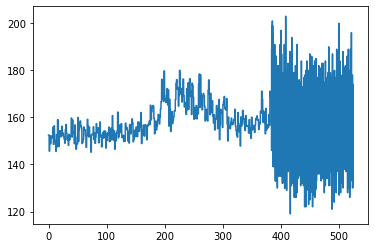

In [205]:
from scipy.signal import medfilt #medfilt is good to get a sense of what's going on with a very noisy signal
t=data.index.to_numpy()*0.064 #time resolution
plt.plot(t, medfilt(data.iloc[:,1],1)) 

In [206]:
k=0
t0=0
it=0
for i in range(1,len(data)-1):
    if data.iloc[:,0][i]!=data.iloc[:,0][i-1] and data.iloc[:,0][i]!=data.iloc[:,0][i+1] and k==0:
        t0,it=t[i], i
        k+=1


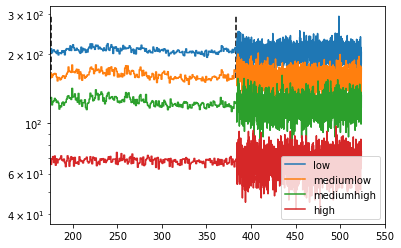

In [207]:
n=1
plt.plot(t, medfilt(data.iloc[:,0],n), label='low')
plt.plot(t, medfilt(data.iloc[:,1],n), label='mediumlow')
plt.plot(t, medfilt(data.iloc[:,2],n), label='mediumhigh')
plt.plot(t, medfilt(data.iloc[:,3],n), label='high')
plt.vlines(t0+duration.loc[trig]['start_T90'],np.min(data),np.max(data),linestyle='dashed')
plt.vlines(t0+duration.loc[trig]['T90']+duration.loc[trig]['start_T90'],np.min(data),np.max(data),linestyle='dashed')
plt.xlim(t0+duration.loc[trig]['start_T90']-1,None)
plt.yscale('log')
plt.legend()

In [209]:
duration.loc[trig]['T90'],duration.loc[trig]['start_T90']

(208.576, -208.896)